# Use OSMnx to analyze a NetworkX street network, including routing
Author Liubov

Inspired from the package: [Geoff Boeing](https://geoffboeing.com/)

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

  To run this notebook start with loading all packages.

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 14.6MB/s 
     |████████████████████████████████| 14.8MB 311kB/s 


In [ ]:
!apt install python3-rtree


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 11 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 k

In [ ]:

!pip install osmnx

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 14.5MB 290kB/s 
     |████████████████████████████████| 11.6MB 45.4MB/s 
     |████████████████████████████████| 10.5MB 46.5MB/s 
  Created wheel for Rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21767 sha256=f33b3f3cc3aff9193aad7c2fbde509b37ddbca86f942149089a79981af238d19
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built Rtree
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10

In [ ]:
import matplotlib.cm as cm
import networkx as nx
import numpy as np
import osmnx as ox
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

# get the network for Moscow, calculate its basic stats, then show the average circuity
#stats = ox.basic_stats(ox.graph_from_place('Arbat, Moscow, Russia'))
#stats['circuity_avg']


'0.16.0'

## Calculate basic street network measures (topological and metric)

How to calculate street network and plot it on a map or as a network.

In [ ]:
# define a function to get adjacency matrix of street network

import csv


def graph_streets_gdf(place):
  stats = ox.basic_stats(ox.graph_from_place(place))
  stats['circuity_avg']
  gdf = ox.gdf_from_place(place)
  area = ox.project_gdf(gdf).unary_union.area
  G = ox.graph_from_place(place, network_type='drive_service')
  stats = ox.basic_stats(G, area=area)
  extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
  for key, value in extended_stats.items():
    stats[key] = value
  pd.Series(stats)

  # projected image 
  G_projected = ox.project_graph(G)
  max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
  max_node, max_bc

  nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
  ns = [50 if node==max_node else 8 for node in G_projected.nodes()]
  fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

  adj_matr = nx.adjacency_matrix(G)
  

  edg_list= nx.generate_edgelist(G)
  print(type(edg_list))
  edlist=[]
  for ed in nx.generate_edgelist(G, data=False):
    #print(ed) 
    edlist.append(ed)

  print(edlist)
  print(type(edlist))

  dense_adj_matr = adj_matr.todense()
  print(np.shape(dense_adj_matr))

  np.savetxt('adj_matrix_streets.txt',dense_adj_matr)
  #np.savetxt('edges_streets.txt',edlist)
  with open('edges_streets.csv', 'w', newline='')  as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(edlist)


  return G 



In [ ]:
# define a function to plot simply network

import csv

def graph_streets_plot(place):
  stats = ox.basic_stats(ox.graph_from_place(place))
  stats['circuity_avg']
  gdf = ox.gdf_from_place(place)

  #area = ox.project_gdf(gdf).unary_union.area
  G = ox.graph_from_place(place, network_type='drive_service')
  #stats = ox.basic_stats(G, area=area)

  extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
  for key, value in extended_stats.items():
    stats[key] = value
  pd.Series(stats)

  fig, ax = ox.plot_graph(G)#, node_size=ns, node_color=nc, node_zorder=2)

  adj_matr = nx.adjacency_matrix(G)
  

  edg_list= nx.generate_edgelist(G)
  print(type(edg_list))
  edlist=[]
  for ed in nx.generate_edgelist(G, data=False):
    #print(ed) 
    edlist.append(ed)

  print(edlist)
  print(type(edlist))

  dense_adj_matr = adj_matr.todense()
  print(np.shape(dense_adj_matr))

  np.savetxt('adj_matrix_streets.txt',dense_adj_matr)
  #np.savetxt('edges_streets.txt',edlist)
  with open('edges_streets.csv', 'w', newline='')  as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(edlist)


  return G 



In [ ]:
# define a function to get streets with COORDINATES for Philippe algorithms

import csv

def graph_streets_get_coordinates(place):
  stats = ox.basic_stats(ox.graph_from_place(place))
  stats['circuity_avg']
  gdf = ox.gdf_from_place(place)

  #area = ox.project_gdf(gdf).unary_union.area
  G = ox.graph_from_place(place, network_type='drive_service')
  #stats = ox.basic_stats(G, area=area)

  extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
  for key, value in extended_stats.items():
    stats[key] = value
  pd.Series(stats)

  fig, ax = ox.plot_graph(G)#, node_size=ns, node_color=nc, node_zorder=2)

  adj_matr = nx.adjacency_matrix(G)

  G_new  = nx.convert_node_labels_to_integers(G)
  #edg_list= nx.generate_edgelist(G_new)

  #edg_list= nx.generate_edgelist(G)
  #print(type(edg_list))
  edlist=[] 
  Nedges = np.shape(G.edges)[0] # number of edges
  print('number of edges', Nedges)
  ed_array = np.zeros((int(Nedges),2))
  ind = 0
  for ed in nx.generate_edgelist(G, data=False):
    edlist.append(ed)
    print(ed)
#    ed_array[ind,0] = ed[0]
#    ed_array[ind,1] = ed[1]
#    ind = ind+1
    

  print(edlist)
  print(type(edlist))
  print(edlist[0])
  print((type(edlist[0])))

  dense_adj_matr = adj_matr.todense()
  print(np.shape(dense_adj_matr))

  np.savetxt('adj_matrix_streets.txt',dense_adj_matr)
  #np.savetxt('edges_streets.txt',edlist)
  with open('edges_streets.csv', 'w', newline='')  as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    #ed_array = np.array(edlist) #edlist_int  = [int(i) for i in edlist] 
    wr.writerow(edlist) #(ed_array) 


  #print(G.nodes)
  print(type(G.nodes))
  coord_list  = []#   np.zeros(len(G.nodes),3) # array to store all coordinates of street nodes
  ind = 0
  for nodeind in nx.nodes(G):
    #print(nodeind)
    lat = G.nodes[nodeind]['x']  #lat
    lon = G.nodes[nodeind]['y'] #lon

    coord_list.append([int(nodeind), '{0:2f}'.format(lat), '{0:2f}'.format(lon)]) #round(lon,3)])
    print(int(nodeind),'{0:2f}'.format(lat), '{0:2f}'.format(lon))
    #coord_array[ind, 0] = nodeind
    #coord_array[ind, 1] = lat
    #coord_array[ind, 2] = lon 
    ind = ind +1 
  #print('type ', type(nodeind), type(lat), type(lon))
  #print(round(lat, 4))
  np.savetxt('coordinates_nodes_streets.txt',coord_list)

  # to get other attributes of nodes: use G[u][v]
  return G 



In [ ]:
# additional function 

import osmnx as ox
import geopandas as gpd
import shapely

def get_polygon_network(point):
  streets_graph = ox.graph_from_point(point, distance=500, network_type='drive')
  streets_graph = ox.project_graph(streets_graph)

  return streets_graph


# test
point = (40.742623, -73.977857)
Gtest = get_polygon_network(point)


fig, ax = ox.plot_graph(Gtest)#, node_size=ns, node_color=nc, node_zorder=2)


In [ ]:
#test 
import numpy as np
x = np.float16(10.0)
print(x)


'{0:.20f}'.format(6.5235375356299998e-07)
print('{0:.20f}'.format(6.5235375356299998e-07))
print('{0:2f}'.format(6.5235375356299998e+01))

<class 'networkx.classes.reportviews.EdgeDataView'>
<class 'networkx.classes.reportviews.EdgeView'>
10.0
0.00000065235375356300
65.235375


In [ ]:
#graph_streets_get_coordinates('Amsterdam, Netherlands ') # too big

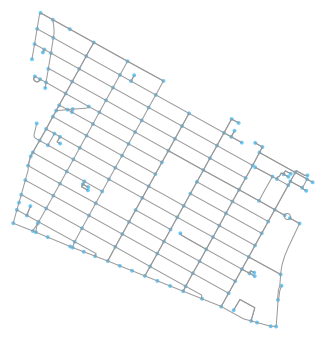

number of edges 363
42421828 42430942
42421828 42430938
42421837 4301088471
42421837 42421828
42423549 42451712
42428489 5357086126
42428489 42428483
42428491 42428489
42428493 42440721
42428493 42428491
42430872 42430886
42430872 42453104
42430886 3892037906
42430886 42449886
42430886 42449017
42430898 42430903
42430898 42442857
42430903 42454994
42430903 42430914
42430914 42430924
42430914 42449023
42430914 42454997
42430924 42430938
42430924 42430914
42430924 42455007
42430924 42449027
42430938 42449029
42430938 42421828
42430938 42455013
42430938 42430924
42430942 42421828
42430942 42449038
42430942 274342024
42430942 42446584
42430945 42444837
42430945 274342021
42434140 42434142
42434140 42443296
42434140 42434196
42434142 7490266268
42434142 42434201
42434148 42434215
42434148 42449023
42434196 4015190382
42434196 42434140
42434197 42443799
42434197 42434196
42434201 5481937338
42434201 42442851
42434205 7490266268
42434205 42434201
42434215 42434205
42434215 42434148
42434215 4

TypeError: ignored

In [ ]:
graph_streets_get_coordinates('East village, Manhattan, New York, NY, USA')

In [ ]:
graph_streets_plot('East village, Manhattan, New York, NY, USA')

/usr/local/lib/python3.6/dist-packages/osmnx/boundaries.py:36: UserWarning: The `boundaries` module has been deprecated and will be removed in a future relase. Use the `geocoder` module's `geocode_to_gdf` function instead.
  warnings.warn(msg)


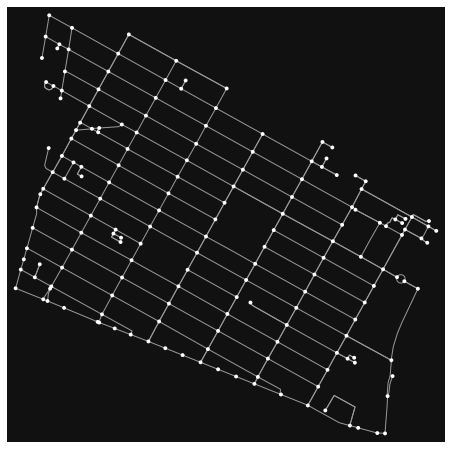

number of edges 355
42421828 42430942
42421828 42430938
42421837 4301088471
42421837 42421828
42423549 42451712
42428489 5357086126
42428489 42428483
42428491 42428489
42430872 42430886
42430872 42453104
42430886 3892037906
42430886 42449886
42430886 42449017
42430898 42430903
42430898 42442857
42430903 42454994
42430903 42430914
42430914 42430924
42430914 42449023
42430914 42454997
42430924 42430938
42430924 42430914
42430924 42455007
42430924 42449027
42430938 42449029
42430938 42421828
42430938 42455013
42430938 42430924
42430942 42421828
42430942 42449038
42430942 274342024
42430942 42446584
42430945 42444837
42430945 274342021
42434140 42434142
42434140 42443296
42434140 42434196
42434142 7490266268
42434142 42434201
42434148 42434215
42434148 42449023
42434196 4015190382
42434196 42434140
42434197 42443799
42434197 42434196
42434201 5481937338
42434201 42442851
42434205 7490266268
42434205 42434201
42434215 42434205
42434215 42434148
42434215 42444829
42434226 42434215
42434226 2

TypeError: ignored

In [ ]:
graph_streets_get_coordinates('East village, Manhattan, New York, NY, USA')

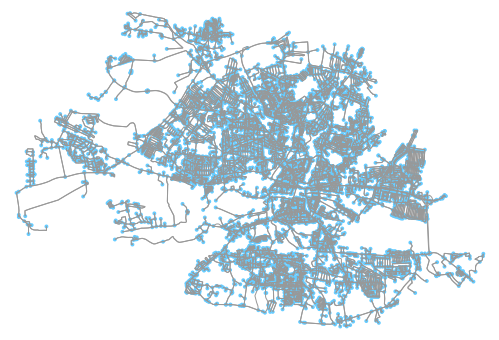

<class 'generator'>
['1157398528 1157398524', '1147830310 1147830344', '1147830310 1147830399', '1147830310 1147830357', '2661089322 2661089206', '2661089322 2661089339', '2661089322 574312409', '7220756528 7220756529', '7220756529 7220756530', '7220756529 1607357548', '7220756529 7220756528', '7220756530 799212158', '7220756530 7220756529', '7220756530 7220756532', '7220756532 7220756530', '2661089339 2661089322', '2661089339 2661089243', '2661089339 574312408', '1147830344 1147830310', '1147830344 1147830422', '1147830344 1147830428', '1147830357 1147830310', '5168169046 5168169049', '5168169046 5406035750', '5168169046 3015396250', '5168169049 2012261011', '5168169049 4265007009', '5168169049 5168169046', '6824165465 1787008884', '6824165465 918602991', '6824165465 918603021', '1140440396 1971332803', '1900806254 538003123', '1900806254 538003116', '1900806254 1731295704', '1900806255 532144808', '1900806255 1900806283', '1900806255 1731295704', '791806069 364856533', '791806069 743

In [ ]:
graph_streets_plot(' Kaliningrad, Kaliningrad Oblast, Russia')

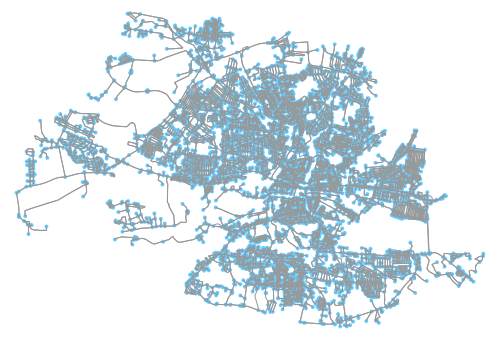

Streaming output truncated to the last 5000 lines.
3900294657 20.551485 54.728175
5514937861 20.450866 54.737447
5514937862 20.452071 54.736481
5514937863 20.451935 54.735520
1473988101 20.453211 54.681939
5924374022 20.503289 54.668999
5514937866 20.450644 54.736562
5514937867 20.452876 54.736436
5514937868 20.453232 54.738195
5514937869 20.453007 54.737218
6989006351 20.545016 54.710002
1152960016 20.500248 54.762264
5514937872 20.450848 54.737378
6989006354 20.543888 54.709868
4289414675 20.459649 54.685352
1154598420 20.452565 54.771353
4289414676 20.459275 54.685392
1515177487 20.472713 54.664915
3900294680 20.554266 54.728836
4761241113 20.506248 54.714441
3900294682 20.551318 54.728853
4289414680 20.459446 54.685511
4761241116 20.505090 54.715046
4761241117 20.506785 54.714079
3900294687 20.550862 54.728977
1152960036 20.503270 54.762839
1152960048 20.505439 54.763196
3900294705 20.553238 54.729326
1515177525 20.469585 54.666117
3900294714 20.554206 54.729554
1152960059 20.50592

TypeError: ignored

In [ ]:
graph_streets_get_coordinates(' Kaliningrad, Kaliningrad Oblast, Russia')

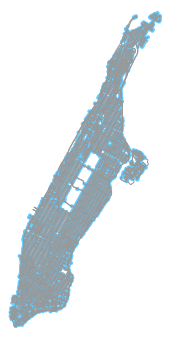

Streaming output truncated to the last 5000 lines.
374475605
42437461
42437463
42437466
277482339
277482344
4999924589
4999924590
4999924591
4999924592
4999924593
42437490
4999924594
4999924595
4999924596
4999924597
4999924599
4999924600
4999924603
4999924606
42437503
4999924607
42437505
4999924609
4999924610
4999924611
7246154629
3814476676
7246154631
3814476679
4999924617
4999924618
4999924619
42453902
3814476690
3814476691
3814476692
3814476695
42437529
42437530
6339939226
60918686
42437536
1209764779
42453934
42437559
42453943
42437564
42453952
4493020097
42437580
60918736
42437589
5871340510
42453986
42437605
42437608
42437612
42437613
42453999
42437618
5540154356
5540154358
5540154359
42454006
5540154361
42454010
42437644
42437654
42454042
247122970
42437663
247122975
42437670
5051485223
5051485226
42437678
5051485234
5051485235
7044189234
42437686
7044189238
42437688
42437693
42437699
42454089
42454102
5959765086
42454120
246647920
2797849715
42437749
42437753
42437755
42437763


In [ ]:
graph_streets_get_coordinates('Manhattan, New York, NY, USA')

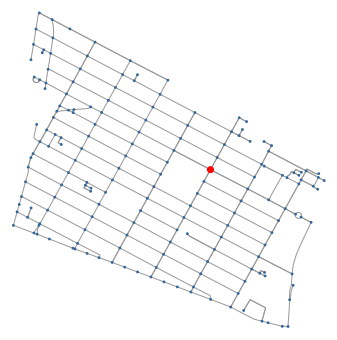

<class 'generator'>
['42421828 42430942', '42421828 42430938', '42421837 4301088471', '42421837 42421828', '42423549 42451712', '42428489 5357086126', '42428489 42428483', '42428491 42428489', '42428493 42440721', '42428493 42428491', '42430872 42430886', '42430872 42453104', '42430886 3892037906', '42430886 42449886', '42430886 42449017', '42430898 42430903', '42430898 42442857', '42430903 42454994', '42430903 42430914', '42430914 42430924', '42430914 42449023', '42430914 42454997', '42430924 42455007', '42430924 42449027', '42430924 42430938', '42430924 42430914', '42430938 42449029', '42430938 42421828', '42430938 42455013', '42430938 42430924', '42430942 42421828', '42430942 42449038', '42430942 274342024', '42430942 42446584', '42430945 42444837', '42430945 274342021', '42434140 42434142', '42434140 42443296', '42434140 42434196', '42434142 7490266268', '42434142 42434201', '42434148 42434215', '42434148 42449023', '42434196 4015190382', '42434196 42434140', '42434197 42443799', '

In [ ]:
G_manh = graph_streets_gdf('East village, Manhattan, New York, NY, USA')

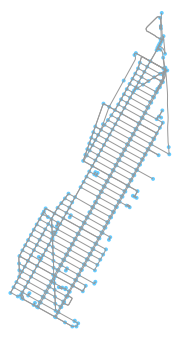

<class 'generator'>
['42426374 3099327964', '42426374 2058919913', '42426374 42446723', '4163940359 42439852', '4163940359 2141026497', '371337226 42449139', '371337226 371337227', '371337226 2141002590', '371337227 589927921', '371337227 371337226', '371337239 2140997998', '371337239 2140994070', '371337241 2140994070', '371337241 42434935', '371337241 42439802', '371337250 5333189426', '371337250 589927903', '7024230434 4016646214', '7024230434 5481882807', '7024230434 7024230446', '7448919081 7448919082', '7448919081 7448919082', '7448919082 7448919081', '7024230446 42435743', '7024230446 42435736', '7024230446 7024230434', '42435794 6431058183', '42435794 5481863725', '42435794 42439858', '4016646214 7024230434', '4016646214 42435736', '42425417 42426971', '1705982030 2141026506', '42439868 42436728', '42439868 2141026524', '3316662357 3316662358', '3316662358 5487825388', '3316662358 3316662357', '5481857114 5481857115', '5481857115 4888388399', '5481857115 5481857114', '548185711

In [ ]:
getG_manh = graph_streets_plot('Harlem, Manhattan, New York, NY, USA')

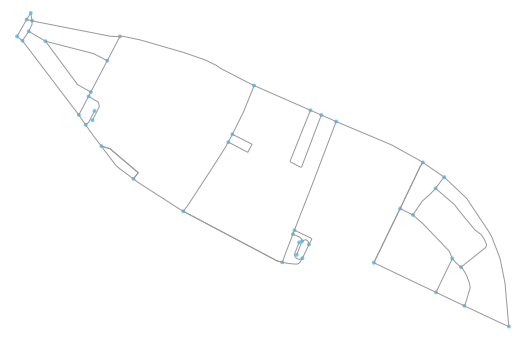

<class 'generator'>
['368125 677610927', '24923329 677182851', '24923329 677182858', '656121288 243461762', '676727427 676728069', '676728036 676728040', '676728036 6400526956', '676728040 676727427', '676728040 676728069', '676728069 676728070', '676728070 6400526956', '676748207 676727427', '676748228 676748207', '676758859 676758861', '676758859 676748207', '676758861 676748229', '676758861 5536182717', '676758863 677151951', '676758863 677151953', '676758884 6400526959', '676788829 676728070', '676788922 676758884', '677104494 677104496', '677104494 676788829', '677104496 677104494', '677104497 677104496', '677104497 2066708518', '677151951 676758863', '677151951 677174952', '677151953 677151955', '677151955 677151953', '677151955 676788829', '677174952 5536184124', '677174961 677174952', '677174965 656121288', '677174965 677151951', '677182851 677182861', '677182851 677182855', '677182855 677610912', '677182858 677185710', '677182858 24923329', '677182861 677598386', '677182861 36

In [ ]:
G_paris = graph_streets_plot('Ile de Cite, Paris, France')

In [ ]:
G_paris = graph_streets_coordinates(' Paris, France')

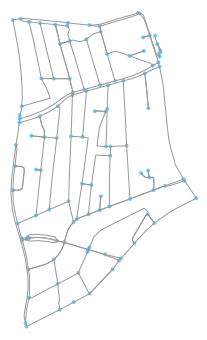

<class 'generator'>
['603085574 2789468446', '603085574 44409277', '44388873 44383127', '44376849 44378318', '44376849 44382250', '6486723351 6486723354', '6486723351 44388873', '6486723351 6486723352', '6486723352 44389841', '6486723352 6486723380', '6486723352 6486723351', '6486723354 6486723351', '6486723354 44382252', '6486723354 6486723355', '6486723355 6486723354', '6486723355 6486723358', '622670876 622670901', '2789468446 7103200343', '44383518 44383127', '44383518 44390849', '6486723360 6486723358', '6486723360 6486683953', '6486723358 44383518', '6486723358 6486723355', '6486723358 6486723360', '44394534 44390844', '44394534 44395829', '44382250 44387025', '44382250 44387025', '6486683947 44365402', '6486683947 6486683953', '6486683947 6486666542', '44382252 6486723354', '29620781 44399997', '29620781 622670951', '6486666542 622670844', '6486666542 6486683947', '6486683953 44372041', '6486683953 6486555637', '6486683953 6486723360', '6486683953 6486683947', '6486723378 648672

In [ ]:
G_nl = graph_streets_plot(' Oude Westen, Rotterdam, Netherlands')

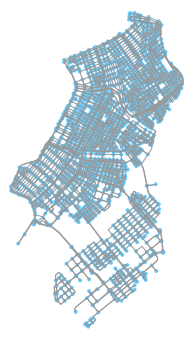

<class 'generator'>
['1695023112 256669806', '1695023112 499185488', '6158680073 1106211459', '6158680073 6158680072', '1105125386 6541263061', '6158680072 1106211981', '6158680072 6158680073', '1105125389 1105125307', '1695023118 1105290889', '1695023118 1106211827', '1695023118 1695023086', '1105125391 1105125593', '1105125391 256671737', '1105125393 6477160786', '1105125393 1072641846', '1105125400 1105125619', '1105125400 1130958483', '860340253 265887785', '860340253 1054155398', '860340253 5939149989', '1105125406 31254376', '1105125406 6166426059', '689881123 598438978', '689881123 951247020', '689881127 1130812185', '689881127 6410946421', '689881128 689881127', '689881128 1105125529', '265887785 460050999', '265887785 5939150707', '265887785 860340253', '1105125419 1105125628', '1105125419 1105152945', '689881134 689881137', '689881134 1130813111', '689881137 260996137', '689881137 1130813178', '1105125425 1105125647', '689881139 236104832', '689881139 1072641478', '1105125430

In [ ]:
G_tokyo = graph_streets_plot('Chuo, Tokyo, Japan')

In [ ]:
G = graph_streets_get_coordinates('Chuo, Tokyo, Japan')

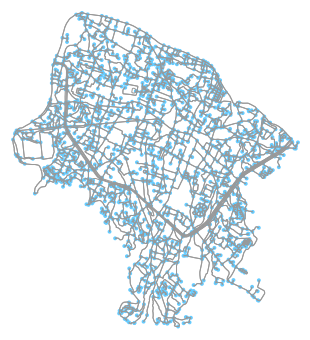

<class 'generator'>
['1480867841 1480867999', '1480867841 4273001090', '1480867841 2514549233', '1274183686 6525021460', '1274183686 1127867419', '1274183686 1274183635', '2516934673 2516934649', '1274183711 6275508265', '1274183711 1274183635', '1274183711 1871829972', '1274183711 1274183669', '3486564395 1382902649', '3486564400 1382902664', '1933312051 1933312052', '1933312051 564129608', '1933312051 2329313950', '1933312052 1933312051', '1933312052 1933312054', '1933312052 2309012017', '1933312054 425268145', '1933312054 2217009674', '1933312054 1933312052', '1933312054 2309012017', '2479349817 1835356903', '2479349817 1835356908', '2479349817 3442442578', '1480867898 1480867643', '1480867898 1480867987', '1480867898 4273001090', '1274183747 562963464', '1274183747 2516955030', '1274183747 3047251279', '1274183783 3440585308', '1274183783 2164887790', '1274183783 2516955777', '1274183783 3440594594', '5021868147 1832594053', '5021868147 5021868148', '5021868147 1832594075', '502186

In [ ]:
G_manh = graph_streets_plot('Lalitpur, Kathmandu, Nepal')

To calculate density-based metrics, you must also pass the network's bounding area in square meters (otherwise basic_stats() will just skip them in the calculation):

In [ ]:
# get the street network for a place, and its area in square meters
place = 'Arbat, Moscow, Russia'
gdf = ox.gdf_from_place(place)
area = ox.project_gdf(gdf).unary_union.area
G = ox.graph_from_place(place, network_type='drive_service')

print('G type', type(G))

G type <class 'networkx.classes.multidigraph.MultiDiGraph'>


In [ ]:
# calculate basic and extended network stats, merge them together, and display
stats = ox.basic_stats(G, area=area)
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

n                                                                                   1083
m                                                                                   2042
k_avg                                                                            3.77101
intersection_count                                                                   732
streets_per_node_avg                                                              2.3795
streets_per_node_counts                        {0: 0, 1: 351, 2: 4, 3: 695, 4: 32, 5: 1}
streets_per_node_proportion            {0: 0.0, 1: 0.32409972299168976, 2: 0.00369344...
edge_length_total                                                                83497.7
edge_length_avg                                                                  40.8901
street_length_total                                                              53394.5
street_length_avg                                                                43.3046
street_segments_count

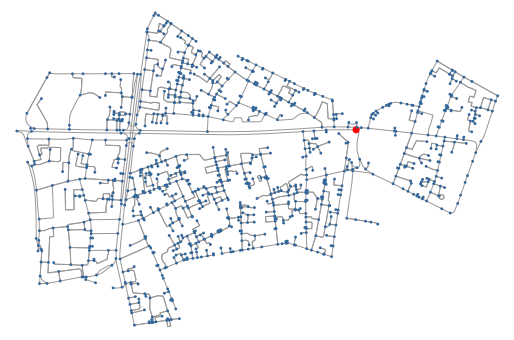

In [ ]:
G_projected = ox.project_graph(G)
max_node, max_bc = max(extended_stats['betweenness_centrality'].items(), key=lambda x: x[1])
max_node, max_bc

nc = ['r' if node==max_node else '#336699' for node in G_projected.nodes()]
ns = [50 if node==max_node else 8 for node in G_projected.nodes()]
fig, ax = ox.plot_graph(G_projected, node_size=ns, node_color=nc, node_zorder=2)

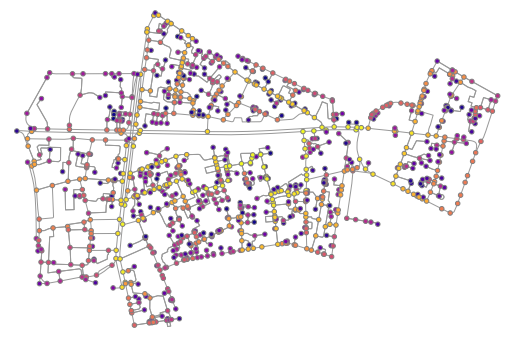

In [ ]:
# get a color for each node
def get_color_list(n, color_map='plasma', start=0, end=1):
    return [cm.get_cmap(color_map)(x) for x in np.linspace(start, end, n)]

def get_node_colors_by_stat(G, data, start=0, end=1):
    df = pd.DataFrame(data=pd.Series(data).sort_values(), columns=['value'])
    df['colors'] = get_color_list(len(df), start=start, end=end)
    df = df.reindex(G.nodes())
    return df['colors'].tolist()

nc = get_node_colors_by_stat(G_projected, data=extended_stats['betweenness_centrality'])
fig, ax = ox.plot_graph(G_projected, node_color=nc, node_edgecolor='gray', node_size=20, node_zorder=2)

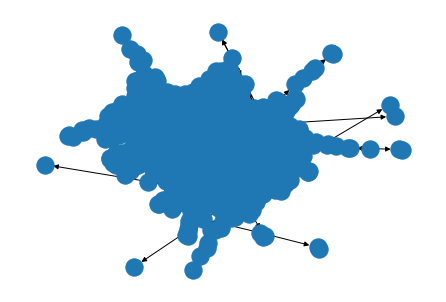

In [ ]:
# directed graph, all streets have directions
# non geocoded streets graph, spring layout
nx.draw(G)


In [ ]:
# get adjacency matrix of graph 

import scipy as sp
import numpy as np
from google.colab import drive 
drive.mount("/drive")



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [ ]:
import os
print( os.getcwd() )
#print( os.listdir('data') )

/content


In [ ]:
from google.colab import files
    
adj_matr = nx.adjacency_matrix(G)
print(type(adj_matr))

edg_list= nx.generate_edgelist(G)
print(type(edg_list))
edlist=[]
for ed in nx.generate_edgelist(G, data=False):
     edlist.append(ed)

print(edlist)
print(type(edlist))

dense_adj_matr = adj_matr.todense()
print(np.shape(dense_adj_matr))

np.savetxt('adj_matrix_arbat_streets.txt',dense_adj_matr)
#np.savetxt('edges_arbat_streets.txt',edlist)


<class 'scipy.sparse.csr.csr_matrix'>
<class 'generator'>
['5416333314 5416333316', '5416333315 5416333316', '5416333316 5416333314', '5416333316 5416333315', '5416333316 5416333317', '5416333317 5416334428', '5416333317 5416333316', '4080201741 4080201745', '6389645327 3916712821', '4080201745 1777464538', '4080201745 4080201741', '335777823 315118575', '335777823 2810029913', '335777824 304772533', '335777824 2810029913', '335777824 1205687067', '2606624805 2606624807', '2606624807 253124537', '2606624807 2606624805', '2606624817 2606624822', '559198257 7004300451', '5220577333 5220577334', '5220577334 3130172282', '5220577334 5220577333', '5220577334 5220577338', '2606624822 2606624817', '2606624822 2606624807', '6389645365 5223559338', '6389645365 6389645372', '5220577338 3130172284', '5220577338 5220577334', '6389645372 6389645365', '271859779 3466483925', '271859779 2072704012', '3065913418 3379668915', '3065913418 5230216487', '3065913418 3065913420', '3065913420 3065913429', '3

Streets/intersection counts and proportions are nested dicts inside the stats dict. To convert these stats to a pandas dataframe (to compare/analyze multiple networks against each other), just unpack these nested dicts first:

In [ ]:
# unpack dicts into individiual keys:values
stats = ox.basic_stats(G, area=area)
for k, count in stats['streets_per_node_counts'].items():
    stats['int_{}_count'.format(k)] = count
for k, proportion in stats['streets_per_node_proportion'].items():
    stats['int_{}_prop'.format(k)] = proportion

# delete the no longer needed dict elements
del stats['streets_per_node_counts']
del stats['streets_per_node_proportion']

# load as a pandas dataframe
pd.DataFrame(pd.Series(stats)).T

,n,m,k_avg,intersection_count,streets_per_node_avg,edge_length_total,edge_length_avg,street_length_total,street_length_avg,street_segments_count,...,int_4_count,int_5_count,int_6_count,int_0_prop,int_1_prop,int_2_prop,int_3_prop,int_4_prop,int_5_prop,int_6_prop
0,401.0,1048.0,5.226933,343.0,2.845387,118766.22,113.326546,62021.577,113.17806,548.0,...,49.0,2.0,1.0,0.0,0.144638,0.004988,0.720698,0.122195,0.004988,0.002494


### Inspect betweenness centrality

Above, the nodes are visualized by betweenness centrality, from low (dark violet) to high (light yellow).

## Routing: calculate the network path from the centermost node to some other node
Let the origin node be the node nearest the location and let the destination node just be the last node in the network. Then find the shortest path between origin and destination, using weight='length' to find the shortest spatial path (otherwise it treats each edge as weight=1).

In [ ]:
# define a lat-long point, create network around point, define origin/destination nodes
location_point = (55.751495, 37.589945) # Arbat Moscow
G_new = ox.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
origin_node = ox.get_nearest_node(G_new, location_point)
destination_node = list(G_new.nodes())[-1]

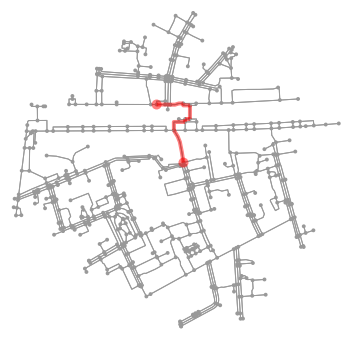

In [ ]:
# find the route between these nodes then plot it
route = nx.shortest_path(G_new, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G_new, route)

In [ ]:
# define a lat-long point, create network around point, define origin/destination nodes
location_point = (48.853251, 2.349441) # Paris
G_new = ox.graph_from_point(location_point, distance=500, distance_type='network', network_type='walk')
origin_node = ox.get_nearest_node(G_new, location_point)
destination_node = list(G_new.nodes())[-1]

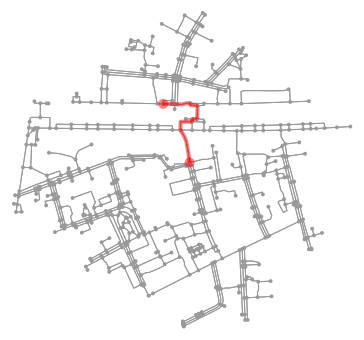

In [ ]:
# project the network to UTM (zone calculated automatically) then plot the network/route again
G_proj = ox.project_graph(G_new)
fig, ax = ox.plot_graph_route(G_proj, route)

## Routing: plot network path from one lat-long to another

In [ ]:
# define origin/desination points then get the nodes nearest to each
origin_point = (55.751495, 37.589945)
destination_point = (55.751455, 37.589755)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

(7233671585, 7233671585)

In [ ]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

'[7233671585]'

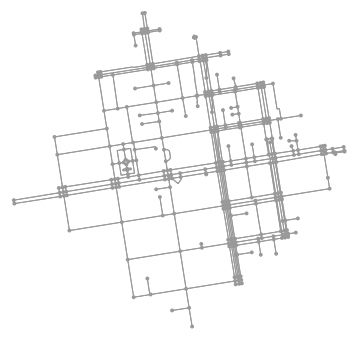

In [ ]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

## Demonstrate routing with one-way streets

See more examples on osmnx package page


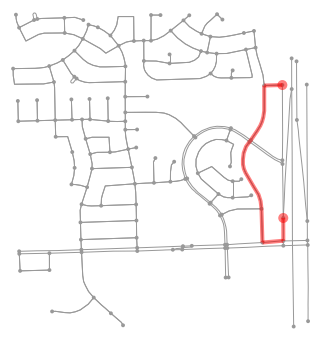

In [ ]:
G = ox.graph_from_address('N. Sicily Pl., Chandler, Arizona', distance=800, network_type='drive')
origin = (33.307792, -111.894940)
destination = (33.312994, -111.894998)
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route, save=True, filename='route')

#### Also, when there are parallel edges between nodes in the route, OSMnx picks the shortest edge to plot

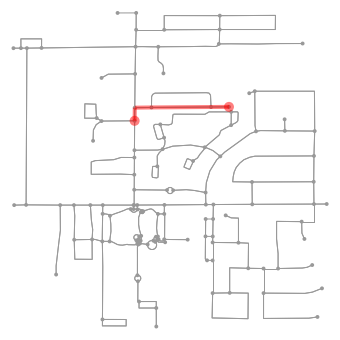

In [ ]:
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, distance=500, clean_periphery=False)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = ox.get_nearest_node(G, origin)
destination_node = ox.get_nearest_node(G, destination)
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route)